## Imports

In [72]:
# Imports 

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import random

## Reading Data

In [74]:
# Load data

df = pd.read_excel('../Bootcamp Data/churn.xlsx')

## EDA

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [77]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [78]:
df.tail()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN
7042,3186-AJIEK,1,United States,California,Apple Valley,92308,"34.424926, -117.184503",34.424926,-117.184503,Male,...,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,0,38,5097,NaN


In [79]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [80]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

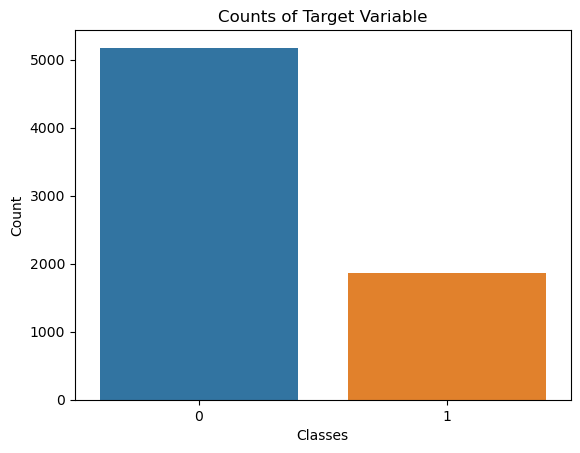

In [81]:
# Bar plot of target class counts

# Groupby object

churn_grp = df.groupby(['Churn Value']).size().reset_index(name='Count')

# Plotting data

sns.barplot(data=churn_grp, x='Churn Value', y='Count')

plt.xlabel('Classes')

plt.title('Counts of Target Variable')

plt.show()

The bar graph reveals that the target classes are greatly unbalanced. 

## Data Preparation

In [84]:
# Dropping nulls, repetitive variables, and unneeded variables

df = df.drop(['Churn Reason', 'Count', 'City', 'Lat Long', 'Latitude', 'Longitude',  
              'Churn Label', 'CustomerID', 'Country', 'Churn Score', 'CLTV', 'Total Charges', 'Monthly Charges', 'Gender', 
             'Multiple Lines', 'Phone Service', 'Streaming TV', 'Streaming Movies', 'State', 'Zip Code'], axis=1)

In [85]:
# Encoding remaining categorical variables

encoder = OneHotEncoder(drop='first', sparse_output = False)

encode_cols = encoder.fit_transform(df[[
    
    'Partner', 'Dependents', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 
    'Tech Support', 'Contract', 'Senior Citizen', 'Paperless Billing', 'Payment Method']])

new_df = pd.DataFrame(encode_cols, columns= encoder.get_feature_names_out([
    
    'Partner', 'Dependents', 'Internet Service', 'Online Security',
    'Online Backup', 'Device Protection', 'Tech Support','Contract', 'Senior Citizen', 'Paperless Billing', 'Payment Method', 

]))

df = df.drop(columns=[
    
    'Partner', 'Dependents', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 
    'Contract', 'Senior Citizen', 'Paperless Billing', 'Payment Method'

]).join(new_df)

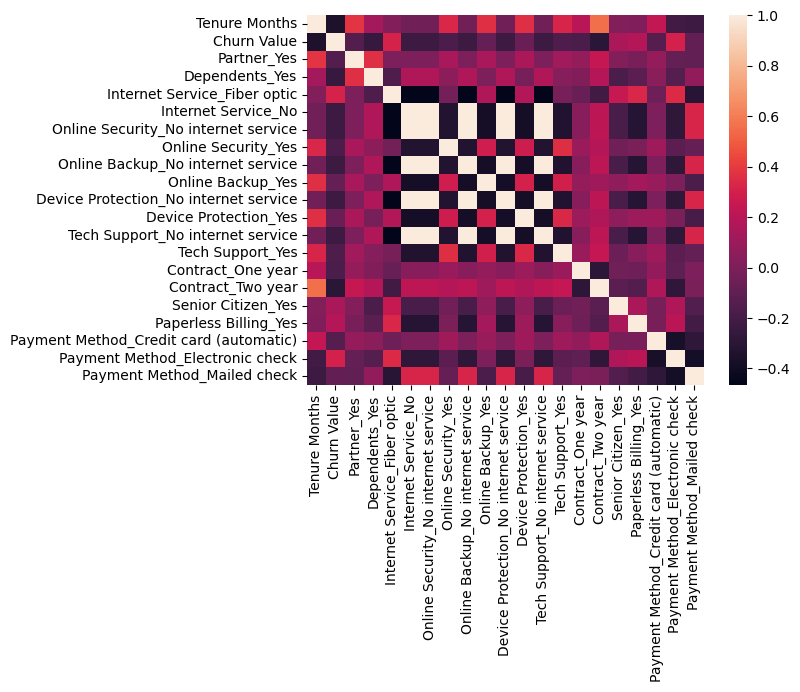

In [86]:
# Heatmap

matrix = df.corr(method='pearson', min_periods=1)

sns.heatmap(data=matrix)

plt.show()

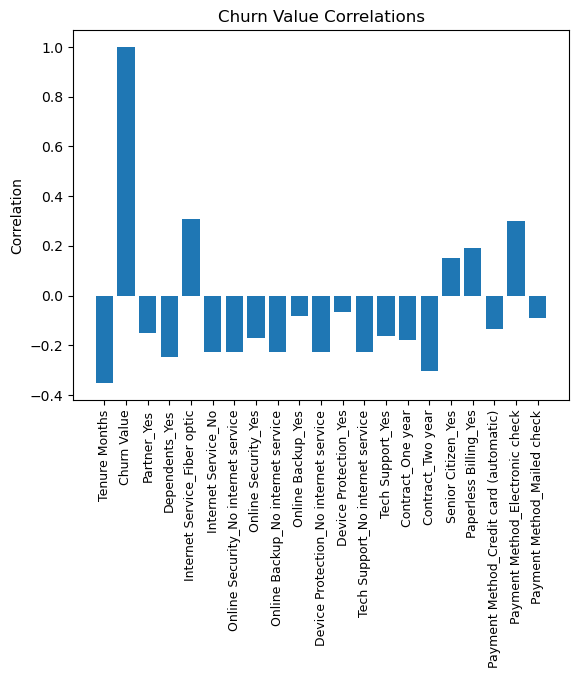

In [87]:
# Bar plot of correlations 

corr_churn = df.corr(method='pearson')['Churn Value'].reset_index(name='Correlation')

# Plotting correlations

plt.bar(data=corr_churn, x='index', height='Correlation')

plt.title('Churn Value Correlations')

plt.ylabel('Correlation')

plt.xticks(rotation=90, size=9)

plt.show()

In [88]:
# Correlation with target 

df.corr(method='pearson')['Churn Value']

Tenure Months                            -0.352229
Churn Value                               1.000000
Partner_Yes                              -0.150448
Dependents_Yes                           -0.248542
Internet Service_Fiber optic              0.308020
Internet Service_No                      -0.227890
Online Security_No internet service      -0.227890
Online Security_Yes                      -0.171226
Online Backup_No internet service        -0.227890
Online Backup_Yes                        -0.082255
Device Protection_No internet service    -0.227890
Device Protection_Yes                    -0.066160
Tech Support_No internet service         -0.227890
Tech Support_Yes                         -0.164674
Contract_One year                        -0.177820
Contract_Two year                        -0.302253
Senior Citizen_Yes                        0.150889
Paperless Billing_Yes                     0.191825
Payment Method_Credit card (automatic)   -0.134302
Payment Method_Electronic check

In [89]:
# Absolute correlation values

df.corr(method='pearson')['Churn Value'].abs().sort_values(ascending=True)

Device Protection_Yes                     0.066160
Online Backup_Yes                         0.082255
Payment Method_Mailed check               0.091683
Payment Method_Credit card (automatic)    0.134302
Partner_Yes                               0.150448
Senior Citizen_Yes                        0.150889
Tech Support_Yes                          0.164674
Online Security_Yes                       0.171226
Contract_One year                         0.177820
Paperless Billing_Yes                     0.191825
Tech Support_No internet service          0.227890
Online Security_No internet service       0.227890
Device Protection_No internet service     0.227890
Online Backup_No internet service         0.227890
Internet Service_No                       0.227890
Dependents_Yes                            0.248542
Payment Method_Electronic check           0.301919
Contract_Two year                         0.302253
Internet Service_Fiber optic              0.308020
Tenure Months                  

Y variables were chosen based on the correlations above. Any variables removed or deemed unneeded were removed based on weaker correlations with the target variable. 

## SVM Model

In [92]:
# Separate target

x = df.drop('Churn Value', axis=1)

y = df['Churn Value']

In [93]:
# SMOTE to handle unbalanced classes

smote = SMOTE(sampling_strategy='minority')

x, y= smote.fit_resample(x,y)

In [94]:
# Train-test split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=1)

In [95]:
# Scale data to ensure numerical y variables are on the same scale

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [96]:
# Model instance

model = SVC()

In [97]:
# Grid search

param_grid = {'C':[9.4, 9.5],'gamma':['scale','auto'], 'kernel':['linear', 'rbf']}

grid = GridSearchCV(model, param_grid)

In [98]:
# Fitting model 

grid.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [9.4, 9.5], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [99]:
# Best params 

grid.best_params_

{'C': 9.5, 'gamma': 'scale', 'kernel': 'rbf'}

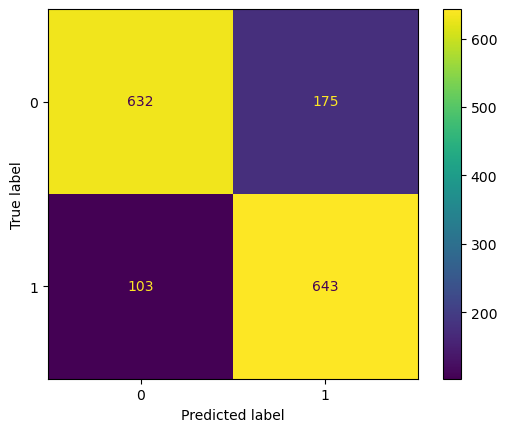

In [100]:
# Confusion matrix

y_pred = grid.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

# Matrix display

display = ConfusionMatrixDisplay(cm, display_labels= grid.classes_)
display.plot()

plt.show()

In [101]:
# Classification report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       807
           1       0.79      0.86      0.82       746

    accuracy                           0.82      1553
   macro avg       0.82      0.82      0.82      1553
weighted avg       0.82      0.82      0.82      1553



In [102]:
# Accuracy score 

accuracy_score(y_test, y_pred)

0.8209916291049582

## Logistic Regression Model

In [104]:
# Separate target 

x = df.drop('Churn Value', axis=1)

y = df['Churn Value']

In [105]:
# Train-test split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [106]:
# Pipeline

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')), 
    ('scaler', StandardScaler()),                  
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced'))])

In [107]:
# Fit pipeline model

pipeline.fit(x_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [108]:
# ROC AUC

roc_auc_score(y_test, pipeline.predict_proba(x_test)[:, 1])

0.8558592617374818

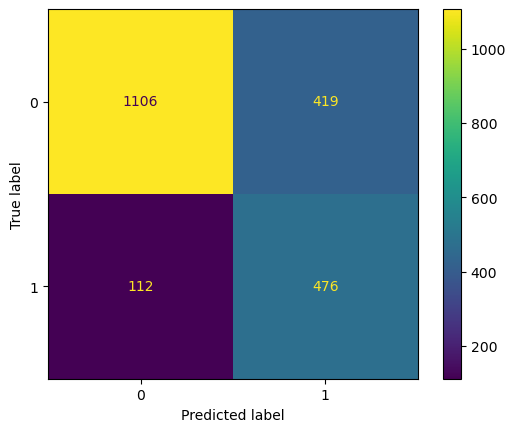

In [109]:
# Confusion matrix

y_pred = pipeline.predict(x_test)
cm2 = confusion_matrix(y_test, y_pred)

# Matrix display

display2 = ConfusionMatrixDisplay(cm2, display_labels= pipeline.classes_)
display2.plot()

plt.show()

In [110]:
# Classification report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1525
           1       0.53      0.81      0.64       588

    accuracy                           0.75      2113
   macro avg       0.72      0.77      0.72      2113
weighted avg       0.80      0.75      0.76      2113



In [111]:
# Accuracy score

accuracy_score(y_test, y_pred)

0.7486985328916232

## Random Forest Model

In [113]:
# Separating target 

x = df.drop('Churn Value', axis=1)

y = df['Churn Value']

In [114]:
# Train-test split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [115]:
# Model instance

rf_mod = RandomForestClassifier(n_estimators=100, random_state=42)

In [116]:
# Fitting model

rf_mod.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

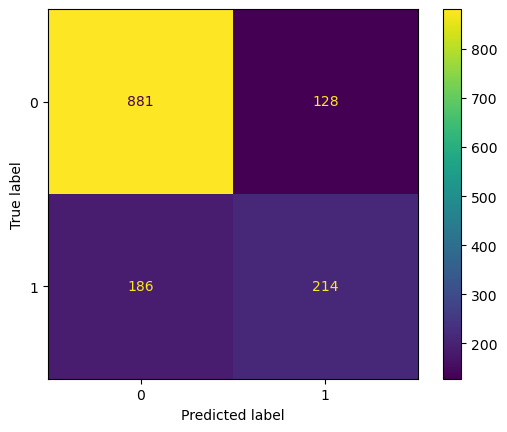

In [117]:
# Confusion matrix

y_pred = rf_mod.predict(x_test)
cm3 = confusion_matrix(y_test, y_pred)

# Matrix display

display3 = ConfusionMatrixDisplay(cm3, display_labels= rf_mod.classes_)
display3.plot()

plt.show()

In [118]:
# Classification report 

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1009
           1       0.63      0.54      0.58       400

    accuracy                           0.78      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.77      0.78      0.77      1409



In [119]:
# Accuracy score 

accuracy_score(y_test, y_pred)

0.7771469127040455

## Final Model Predictions

The SVM model is the better model of all three with a slightly higher accuracy, and given the same x variables which were chosen based on higher correlations with Churn Value. 

In [122]:
# Generating a sample 

my_list = [0]*10 + [1]*10  

random.shuffle(my_list)

my_list

[0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0]

In [123]:
# Turning sample list into dataframe

df2 = pd.DataFrame(columns=x.columns)

df2.loc[0] = my_list

In [124]:
# Using SVM model to predict sample target value

grid.predict(df2)

/Users/claireoates-calver/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


array([1])

From this sample, the model predicts the customer is likely to churn. 